In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
n = 5
mu = 0
sigma = 1
sample = np.random.normal(mu, sigma, n)
# sample = np.random.gamma(2, 2, n)

def kernel_fun(x, x_i, h):
    return 1/np.sqrt(2*np.pi)* 1/h * np.exp(1)**-((x-x_i)/h)**2/2

def kde(x, sample, n):
    h = np.sqrt(np.var(sample))
    estimate = 0
    for i in range(n):
        estimate += kernel_fun(x, sample[i], h)
    return estimate/n

x = np.arange(-4, 4, 0.01)
y = kde(x, sample, n)
z = 1/np.sqrt(2*np.pi)* np.exp(1)**-(x*x/2) 
# z = np.exp(-2*x)*4*x
h = np.sqrt(np.var(sample))

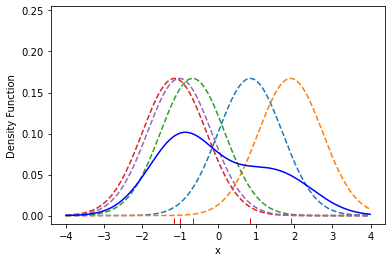

<Figure size 504x288 with 0 Axes>

In [3]:
sns.rugplot(sample, height=0.025, color='r')
plt.plot(x, kernel_fun(x, sample[0], h), linestyle='dashed')
plt.plot(x, kernel_fun(x, sample[1], h), linestyle='dashed')
plt.plot(x, kernel_fun(x, sample[2], h), linestyle='dashed')
plt.plot(x, kernel_fun(x, sample[3], h), linestyle='dashed')
plt.plot(x, kernel_fun(x, sample[4], h), linestyle='dashed')
plt.plot(x, y, 'b')

plt.ylabel("Density Function")
plt.xlabel("x")

plt.ylim(-0.01, 0.255)
plt.figure(figsize=(7,4))
plt.show()

In [4]:
data = pd.read_csv("faithful_data.txt")

sample = data['waiting']

def kernel_fun_gauss(x, x_i, h):
    return 1/np.sqrt(2*np.pi)* 1/h * np.exp(1)**-((x-x_i)/h)**2/2

def kernel_fun_unif(x, x_i, h):
    return 1/2 * bool((x-x_i)/h  >= -1 and (x-x_i)/h  < 1)

def kernel_fun_epane(x, x_i, h):
    return 3/4 * max (1-(x-x_i)**2/h**2, 0)

def kde1(x, sample, n):
    h = np.sqrt(np.var(sample))
    estimate = 0
    for i in range(n):
        estimate += kernel_fun_gauss(x, sample[i], h)
    return estimate/n

def kde2(x, sample, n):
    h = np.sqrt(np.var(sample))
    estimate = 0
    for i in range(n):
        estimate += kernel_fun_unif(x, sample[i], h)
    return estimate/n

def kde3(x, sample, n):
    h = np.sqrt(np.var(sample))
    estimate = 0
    for i in range(n):
        estimate += kernel_fun_epane(x, sample[i], h)
    return estimate/n

[Text(0.5, 0, 'Epanechnikov Kernel'), Text(0, 0.5, 'Density')]

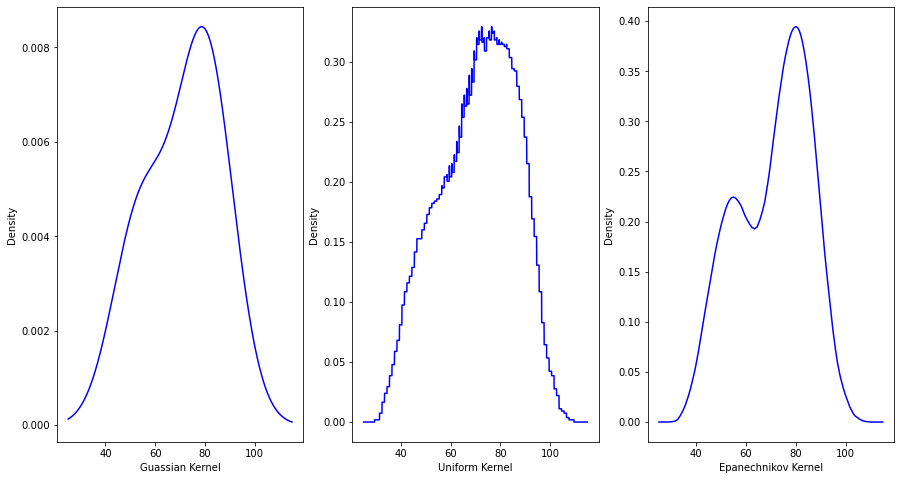

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,8))

x = np.arange(25, 115, 0.05)
n = len(sample)

y = []
for i in range(len(x)):
    y.append(kde1(x[i], sample, n))
ax1.plot(x, y, 'b')
ax1.set(xlabel='Guassian Kernel', ylabel = 'Density')

y = []
for i in range(len(x)):
    y.append(kde2(x[i], sample, n))
ax2.plot(x, y, 'b')
ax2.set(xlabel='Uniform Kernel', ylabel = 'Density')

y = []
for i in range(len(x)):
    y.append(kde3(x[i], sample, n))
ax3.plot(x, y, 'b')
ax3.set(xlabel='Epanechnikov Kernel', ylabel = 'Density')